In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [102]:
df=pd.read_csv(r"C:\Users\laksh\Downloads\Life-Expectancy-Data-Averaged.csv")
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


In [103]:
df.shape

(179, 20)

In [104]:
df.size

3580

In [105]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


In [106]:
df.tail()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
174,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.5625,8.2375,1.0,72.79375
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.6250,6.9000,1.0,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.7500,2.2250,1.0,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.7625,6.4375,1.0,52.33125
178,Zimbabwe,Africa,2007.5,50.16875,85.32500,572.974312,2.900625,79.5625,64.0000,23.54375,79.5625,79.1250,8.006250,1290.6250,12.538750,7.01250,6.9875,7.2125,1.0,48.66250


In [107]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status',
       'Life_expectancy'],
      dtype='object')

In [108]:
df.dtypes

Country                         object
Region                          object
Year                           float64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                    float64
Measles                        float64
BMI                            float64
Polio                          float64
Diphtheria                     float64
Incidents_HIV                  float64
GDP_per_capita                 float64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status                 float64
Life_expectancy                float64
dtype: object

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

In [110]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2007.5,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.793296,68.856075
std,0.0,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,2.311895,16893.054182,136.655286,4.111094,4.195663,3.126912,0.406077,9.197699
min,2007.5,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,0.010000,263.937500,0.085000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,2007.5,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,0.080000,1409.906250,2.108125,1.756250,1.731250,4.946875,1.000000,62.303125
50%,2007.5,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,0.164375,4402.625000,7.660625,3.556250,3.718750,7.831250,1.000000,71.506250
75%,2007.5,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,0.516250,12037.781250,22.745313,7.165625,7.056250,10.365625,1.000000,74.937500
max,2007.5,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,18.164375,102972.687500,1321.239375,27.100000,27.943750,13.268750,1.000000,82.456250


In [111]:
df.isnull().sum()
# no null values

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

In [112]:
df.duplicated().sum()
# No duplicate rows

0

In [113]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyan

In [114]:
df['Region'].unique()

array(['Asia', 'Rest of Europe', 'Africa',
       'Central America and Caribbean', 'South America', 'Oceania',
       'European Union', 'Middle East', 'North America'], dtype=object)

<Axes: >

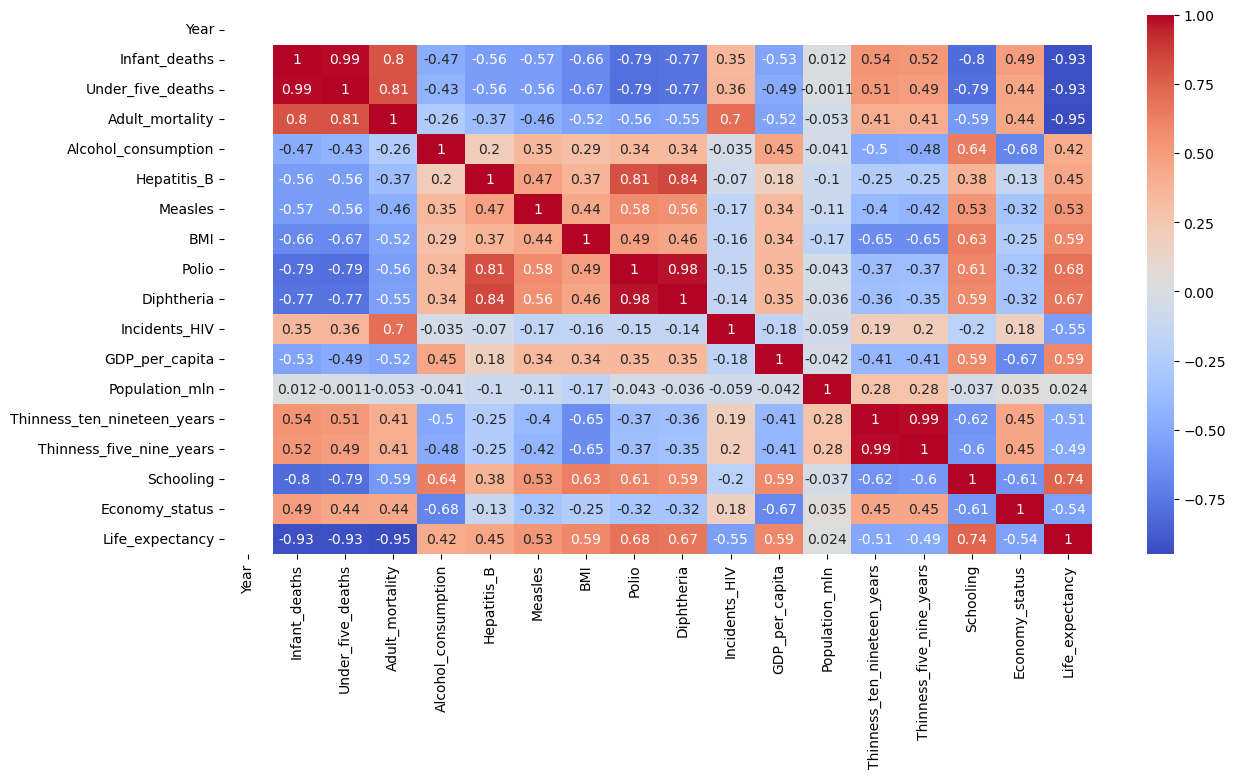

In [116]:
plt.figure(figsize=(14,7))
sns.heatmap(df.select_dtypes(['number']).corr(),annot=True,cmap='coolwarm')

In [118]:
le1=LabelEncoder()
le2=LabelEncoder()
df['Country']=le1.fit_transform(df['Country'])
df['Region']=le2.fit_transform(df['Region'])

In [120]:
x=df.drop("Life_expectancy",axis=1)
x.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status
0,0,1,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0
1,1,7,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0
2,2,0,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0
3,3,0,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0
4,4,2,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0


In [121]:
y=df['Life_expectancy']
y.head()

0    59.65625
1    75.95000
2    73.78750
3    52.82500
4    75.35000
Name: Life_expectancy, dtype: float64

In [122]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [154]:
models = {
    "Linear": LinearRegression(n_jobs=-1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boost": GradientBoostingRegressor(n_estimators=50,random_state=42),
    "Ada Boost": AdaBoostRegressor(n_estimators=50,learning_rate=0.3,random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Support Vector": SVR()
    
}

results = []

for name, model in models.items():
    model.fit(xtrain, ytrain) 
    ypred = model.predict(xtest)
    
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest) 
    
    results.append([name, mse, r2, trainac, testac])

df_results = pd.DataFrame(results, columns=["Model", "MSE", "R² Score", "Training score", "Test score"])

print(df_results.to_string(index=False))
# print(df_results)

         Model       MSE  R² Score  Training score  Test score
        Linear  1.810450  0.981769        0.982332    0.981769
 Decision Tree  7.452839  0.924950        1.000000    0.924950
 Random Forest  3.783812  0.961897        0.994977    0.961897
Gradient Boost  3.196567  0.967810        0.998276    0.967810
     Ada Boost  3.284039  0.966930        0.979647    0.966930
           KNN 10.788948  0.891355        0.937910    0.891355
Support Vector 31.590937  0.681878        0.780629    0.681878
